# Plotting Shot and Pass Maps and Passing Networks using mplsoccer Python package

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch
import matplotlib.pyplot as plt

%matplotlib inline

### About mplsoccer

The mplsoccer library is that is used to draw a variety of pitches, as well as other visualizations such as radar and bumpy charts using python. Here, we will use the Pitch and VerticalPitch classes to draw the pitches we will use for analysis. Another great feature of this library is that it includes functions that return Statsbomb free data tidy dataframe. We will use the Sbopen() function in the next few lines of code to retrieve  match event data from StatsBomb.

In [2]:
parser = Sbopen()

Examining Statsbomb competition function.

In [3]:
df_competition = parser.competition()
df_competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             42 non-null     int64 
 1   season_id                  42 non-null     int64 
 2   country_name               42 non-null     object
 3   competition_name           42 non-null     object
 4   competition_gender         42 non-null     object
 5   competition_youth          42 non-null     bool  
 6   competition_international  42 non-null     bool  
 7   season_name                42 non-null     object
 8   match_updated              42 non-null     object
 9   match_updated_360          41 non-null     object
 10  match_available_360        3 non-null      object
 11  match_available            42 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 3.5+ KB


Let's see which competitions are available for analysis.

In [4]:
df_competition

competition_id  season_id              country_name  \
0               16          4                    Europe   
1               16          1                    Europe   
2               16          2                    Europe   
3               16         27                    Europe   
4               16         26                    Europe   
5               16         25                    Europe   
6               16         24                    Europe   
7               16         23                    Europe   
8               16         22                    Europe   
9               16         21                    Europe   
10              16         41                    Europe   
11              16         39                    Europe   
12              16         37                    Europe   
13              16         44                    Europe   
14              16         76                    Europe   
15              37         90                   England   
16              37         42                   England   
17              37          4                   England   
18              43          3             International   
19            1238        108                     India   
20              11         90                     Spain   
21              11         42                     Spain   
22              11          4                     Spain   
23              11          1                     Spain   
24              11          2                     Spain   
25              11         27                     Spain   
26              11         26                     Spain   
27              11         25                     Spain   
28              11         24                     Spain   
29              11         23                     Spain   
30              11         22                     Spain   
31              11         21                     Spain   
32              11         41                     Spain   
33              11         40                     Spain   
34              11         39                     Spain   
35              11         38                     Spain   
36              11         37                     Spain   
37              49          3  United States of America   
38               2         44                   England   
39              55         43                    Europe   
40              53        106                    Europe   
41              72         30             International   

           competition_name competition_gender  competition_youth  \
0          Champions League               male              False   
1          Champions League               male              False   
2          Champions League               male              False   
3          Champions League               male              False   
4          Champions League               male              False   
5          Champions League               male              False   
6          Champions League               male              False   
7          Champions League               male              False   
8          Champions League               male              False   
9          Champions League               male              False   
10         Champions League               male              False   
11         Champions League               male              False   
12         Champions League               male              False   
13         Champions League               male              False   
14         Champions League               male              False   
15  FA Women's Super League             female              False   
16  FA Women's Super League             female              False   
17  FA Women's Super League             female              False   
18           FIFA World Cup               male              False   
19      Indian Super league               male              False   
20               

We've decided to use the men's Champions League final (competition id = 16) for the 2012/2013 season (season id = 24). We would run the competition id and season id through the Sbopen() ("parser") function.

In [5]:
df_match = parser.match(competition_id=16, season_id=24)

In [6]:
df_match

match_id match_date            kick_off  home_score  away_score  \
0     18240 2013-05-25 2013-05-25 20:45:00           1           2   

  match_status match_status_360            last_updated  \
0    available        scheduled 2021-07-10 13:41:45.751   

         last_updated_360  match_week  ...  competition_stage_id  \
0 2021-06-13 16:17:31.694           1  ...                    26   

  competition_stage_name stadium_id     stadium_name stadium_country_id  \
0                  Final       4666  Wembley Stadium                 68   

   stadium_country_name referee_id    referee_name referee_country_id  \
0               England        419  Nicola Rizzoli                112   

   referee_country_name  
0                 Italy  

[1 rows x 50 columns]

We need the match id to get the event data from the 2012/2013 UCL Final.

### Grabbing the match event dataset

In [7]:
df, related, freeze, tactics = parser.event(18240)

#get team names
team1, team2 = df.team_name.unique()

### Making dataframe that only includes the shooting events in the match

In [8]:
#A dataframe of shots
shots = df.loc[df['type_name']== 'Shot'].set_index('id')
shots.head()


index  period        timestamp  minute  \
id                                                                             
4b31ef19-0fd1-456e-bb13-cd7f32cc8736    137       1  00:02:30.259000       2   
a83a0d0b-1291-414c-88e3-0b67d2914ba6    481       1  00:09:50.271000       9   
76aef6c2-a546-4ab9-86eb-afa71d36c2e0    625       1  00:13:02.577000      13   
07cbde86-3135-4e29-8979-2567f935c7b1    638       1  00:14:00.037000      14   
191b28d3-4d52-4188-b7e0-1836bf5e2e0d    832       1  00:18:34.827000      18   

                                      second  possession  duration  match_id  \
id                                                                             
4b31ef19-0fd1-456e-bb13-cd7f32cc8736      30           7  0.419666     18240   
a83a0d0b-1291-414c-88e3-0b67d2914ba6      50          22  2.119020     18240   
76aef6c2-a546-4ab9-86eb-afa71d36c2e0       2          32  1.687500     18240   
07cbde86-3135-4e29-8979-2567f935c7b1       0          33  0.529141     18240   
191b28d3-4d52-4188-b7e0-1836bf5e2e0d      34          41  0.921807     18240   

                                      type_id type_name  ...  block_offensive  \
id                                                       ...                    
4b31ef19-0fd1-456e-bb13-cd7f32cc8736       16      Shot  ...              NaN   
a83a0d0b-1291-414c-88e3-0b67d2914ba6       16      Shot  ...              NaN   
76aef6c2-a546-4ab9-86eb-afa71d36c2e0       16      Shot  ...              NaN   
07cbde86-3135-4e29-8979-2567f935c7b1       16      Shot  ...              NaN   
191b28d3-4d52-4188-b7e0-1836bf5e2e0d       16      Shot  ...              NaN   

                                     shot_redirect  shot_open_goal  \
id                                                                   
4b31ef19-0fd1-456e-bb13-cd7f32cc8736           NaN             NaN   
a83a0d0b-1291-414c-88e3-0b67d2914ba6           NaN             NaN   
76aef6c2-a546-4ab9-86eb-afa71d36c2e0           NaN             NaN   
07cbde86-3135-4e29-8979-2567f935c7b1           NaN             NaN   
191b28d3-4d52-4188-b7e0-1836bf5e2e0d           NaN             NaN   

                                     foul_committed_penalty  foul_won_penalty  \
id                                                                              
4b31ef19-0fd1-456e-bb13-cd7f32cc8736                    NaN               NaN   
a83a0d0b-1291-414c-88e3-0b67d2914ba6                    NaN               NaN   
76aef6c2-a546-4ab9-86eb-afa71d36c2e0                    NaN               NaN   
07cbde86-3135-4e29-8979-2567f935c7b1                    NaN               NaN   
191b28d3-4d52-4188-b7e0-1836bf5e2e0d                    NaN               NaN   

                                     block_save_block  bad_behaviour_card_id  \
id                                                                             
4b31ef19-0fd1-456e-bb13-cd7f32cc8736              NaN                    NaN   
a83a0d0b-1291-414c-88e3-0b67d2914ba6              NaN                    NaN   
76aef6c2-a546-4ab9-86eb-afa71d36c2e0              NaN                    NaN   
07cbde86-3135-4e29-8979-2567f935c7b1              NaN                    NaN   
191b28d3-4d52-4188-b7e0-1836bf5e2e0d              NaN                    NaN   

                                      bad_behaviour_card_name  \
id                                                              
4b31ef19-0fd1-456e-bb13-cd7f32cc8736                      NaN   
a83a0d0b-1291-414c-88e3-0b67d2914ba6                      NaN   
76aef6c2-a546-4ab9-86eb-afa71d36c2e0                      NaN   
07cbde86-3135-4e29-8979-2567f935c7b1                      NaN   
191b28d3-4d52-4188-b7e0-1836bf5e2e0d                      NaN   

                                     substitution_replacement_id  \
id                                                                 
4b31ef19-0fd1-456e-bb13-cd7f32cc8736                         NaN   
a83a0d0b-1291-414c-88e3-0b67d2914ba6                         NaN   


In [ ]:
#Reset column display options to see all columns
pd.set_option('display.max_columns', None)

## Plotting shot map

### Making shot map using iterative solution

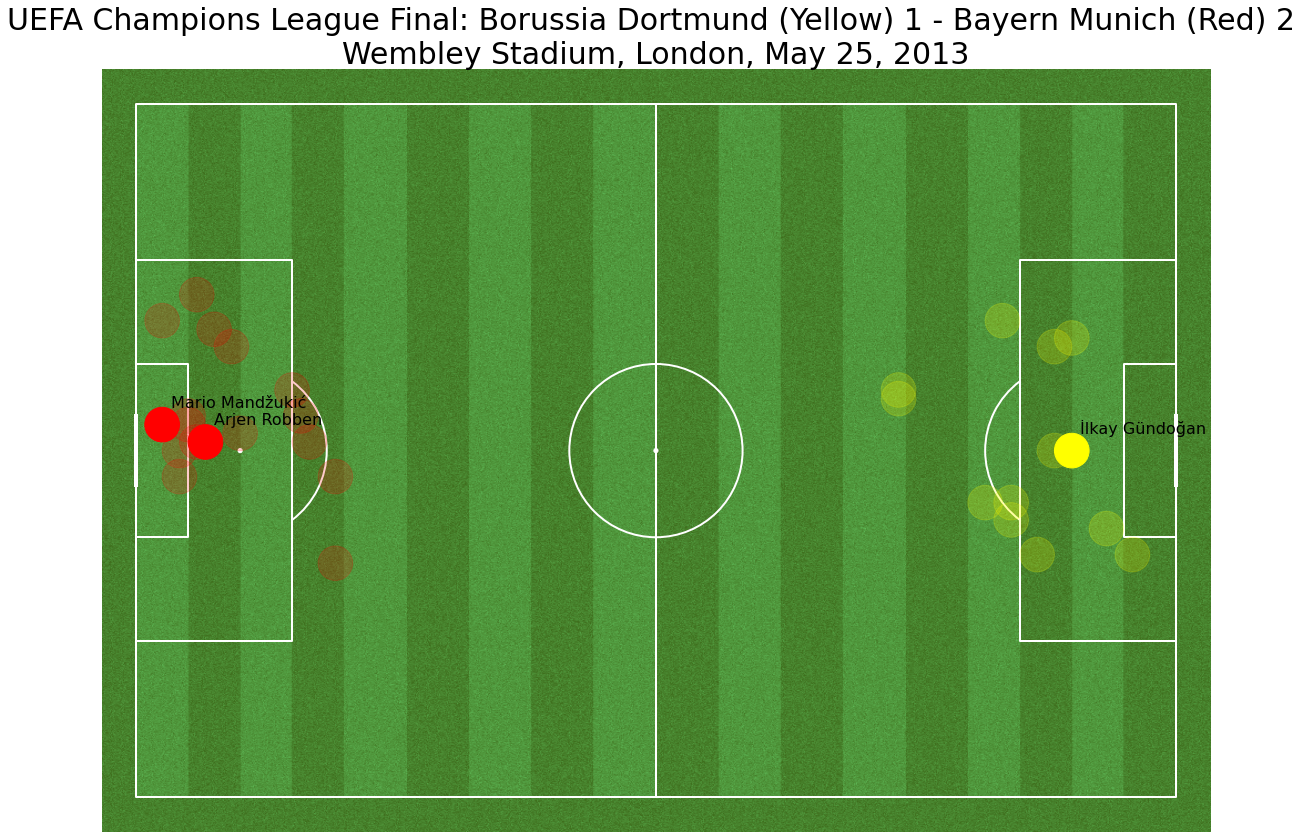

In [10]:
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.draw(figsize=(16, 12))

#Size of the pitch in yards
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i, shot in shots.iterrows():
    #get the data
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circle size
    circleSize=2
    #plot Borussia Dortmund
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y), circleSize, color = "yellow")
            plt.text(x+1, y-2,shot['player_name'], size = 16)
        else:
            shotCircle=plt.Circle((x,y), circleSize, color = "yellow")
            shotCircle.set_alpha(.2)
    #plot Bayern Munich
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX - x, pitchWidthY - y), circleSize, color="red")
            plt.text(pitchLengthX - x + 1, pitchWidthY - y - 2, shot['player_name'], size = 16)
        else: 
            shotCircle=plt.Circle((pitchLengthX - x, pitchWidthY - y), circleSize, color="red")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#Set Title, Subtitle and Captions
#plt.title("May 25, 2013, Wembley Stadium, London")
plt.title("UEFA Champions League Final: Borussia Dortmund (Yellow) 1 - Bayern Munich (Red) 2 \nWembley Stadium, London, May 25, 2013", size =30)

plt.show()
            
            

As shown in the shot map, the circles represent shots that were taken in the match, with the boldly colored circles representing goals scored. Bayern Munich ("Bayern") had most of its shots in the penalty area, a cluster of those shots were in or just outside the 6-yard box (the boxed rectangle closest to the goal). On the other hand, Borussia Dortmund ("Dortmund") had half of its shots outside of the penalty area. Illkay Gündogan scored Dortmund's only goal which was a penalty shot. Arjen Robben scored the winning goal for Bayern with a minute left in ('89) the match.

## Plotting pass maps

In [ ]:
# We're going to use the data for the same game but we'll focus on Bayern's passes.

In [ ]:
# Making a dataframe that only has passes.

In [11]:
passes = df.loc[df['type_name']=='Pass'].loc[df['sub_type_name']!='Throw-in'].set_index('id')
passes.head()

index  period        timestamp  minute  \
id                                                                             
a2615e19-4e6e-46ce-bfe7-9687c5c6fd87      5       1  00:00:00.632000       0   
ac3fca2d-933d-4436-bf33-cc6f29e26193      8       1  00:00:01.072000       0   
cb62c659-2133-40ff-b176-77941d61ceb8     11       1  00:00:03.367000       0   
b455695e-8c4a-4230-a114-a53df59117f2     15       1  00:00:06.550000       0   
9cab6908-1730-4b8b-b75b-1fcb9bb26d68     18       1  00:00:10.326000       0   

                                      second  possession  duration  match_id  \
id                                                                             
a2615e19-4e6e-46ce-bfe7-9687c5c6fd87       0           2  0.400000     18240   
ac3fca2d-933d-4436-bf33-cc6f29e26193       1           2  1.230583     18240   
cb62c659-2133-40ff-b176-77941d61ceb8       3           2  1.359776     18240   
b455695e-8c4a-4230-a114-a53df59117f2       6           2  1.916380     18240   
9cab6908-1730-4b8b-b75b-1fcb9bb26d68      10           2  1.290792     18240   

                                      type_id type_name  ...  block_offensive  \
id                                                       ...                    
a2615e19-4e6e-46ce-bfe7-9687c5c6fd87       30      Pass  ...              NaN   
ac3fca2d-933d-4436-bf33-cc6f29e26193       30      Pass  ...              NaN   
cb62c659-2133-40ff-b176-77941d61ceb8       30      Pass  ...              NaN   
b455695e-8c4a-4230-a114-a53df59117f2       30      Pass  ...              NaN   
9cab6908-1730-4b8b-b75b-1fcb9bb26d68       30      Pass  ...              NaN   

                                     shot_redirect  shot_open_goal  \
id                                                                   
a2615e19-4e6e-46ce-bfe7-9687c5c6fd87           NaN             NaN   
ac3fca2d-933d-4436-bf33-cc6f29e26193           NaN             NaN   
cb62c659-2133-40ff-b176-77941d61ceb8           NaN             NaN   
b455695e-8c4a-4230-a114-a53df59117f2           NaN             NaN   
9cab6908-1730-4b8b-b75b-1fcb9bb26d68           NaN             NaN   

                                     foul_committed_penalty  foul_won_penalty  \
id                                                                              
a2615e19-4e6e-46ce-bfe7-9687c5c6fd87                    NaN               NaN   
ac3fca2d-933d-4436-bf33-cc6f29e26193                    NaN               NaN   
cb62c659-2133-40ff-b176-77941d61ceb8                    NaN               NaN   
b455695e-8c4a-4230-a114-a53df59117f2                    NaN               NaN   
9cab6908-1730-4b8b-b75b-1fcb9bb26d68                    NaN               NaN   

                                     block_save_block  bad_behaviour_card_id  \
id                                                                             
a2615e19-4e6e-46ce-bfe7-9687c5c6fd87              NaN                    NaN   
ac3fca2d-933d-4436-bf33-cc6f29e26193              NaN                    NaN   
cb62c659-2133-40ff-b176-77941d61ceb8              NaN                    NaN   
b455695e-8c4a-4230-a114-a53df59117f2              NaN                    NaN   
9cab6908-1730-4b8b-b75b-1fcb9bb26d68              NaN                    NaN   

                                      bad_behaviour_card_name  \
id                                                              
a2615e19-4e6e-46ce-bfe7-9687c5c6fd87                      NaN   
ac3fca2d-933d-4436-bf33-cc6f29e26193                      NaN   
cb62c659-2133-40ff-b176-77941d61ceb8                      NaN   
b455695e-8c4a-4230-a114-a53df59117f2                      NaN   
9cab6908-1730-4b8b-b75b-1fcb9bb26d68                      NaN   

                                     substitution_replacement_id  \
id                                                                 
a2615e19-4e6e-46ce-bfe7-9687c5c6fd87                         NaN   
ac3fca2d-933d-4436-bf33-cc6f29e26193                         NaN   


### Using an iterative solution to plot pass maps for Thomas Müller (Bayern) and Marco Reus (Dortmund)

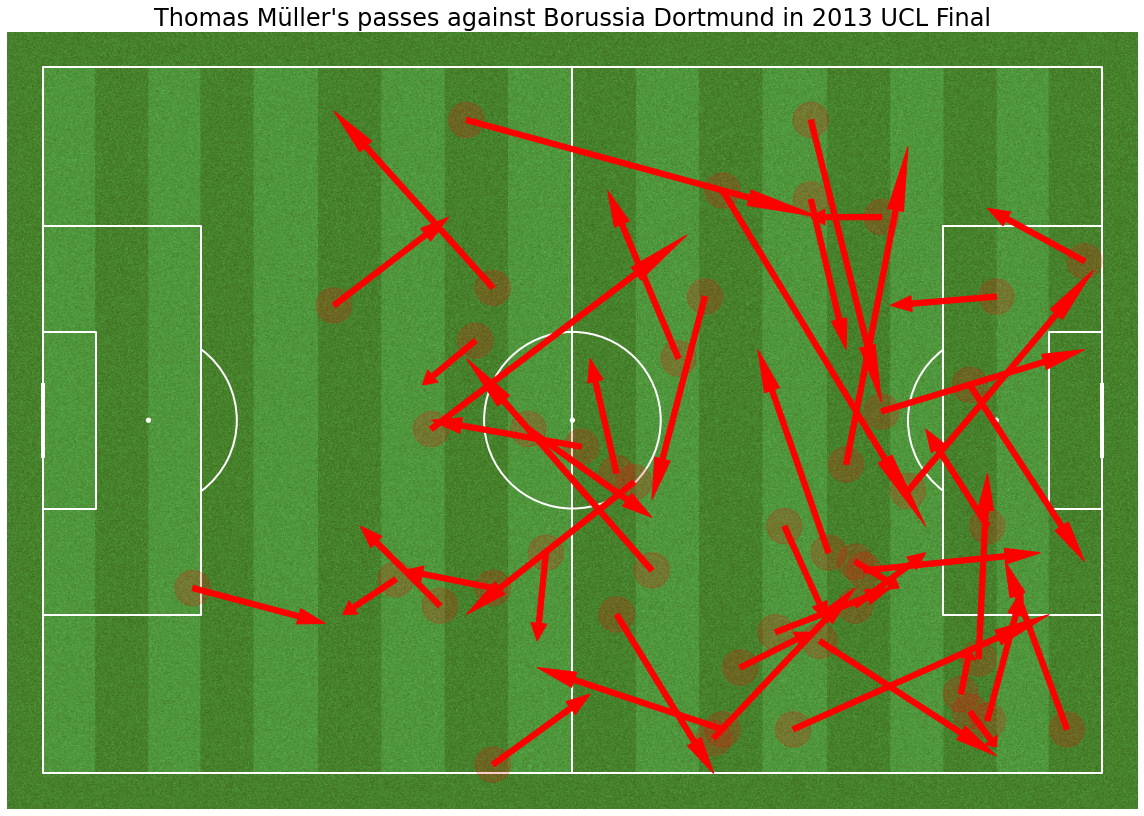

In [13]:
#Thomas Müller pass map
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.draw(figsize=(16, 12))

for i,thepass in passes.iterrows():
    #Passes by Thomas Müller:
    if thepass['player_name']=='Thomas Müller':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2, color="red")
        passCircle.set_alpha(0.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="red")
        ax.add_patch(passArrow)
        
ax.set_title("Thomas Müller's passes against Borussia Dortmund in 2013 UCL Final", fontsize = 24)
fig.set_size_inches(16, 12)
plt.show()


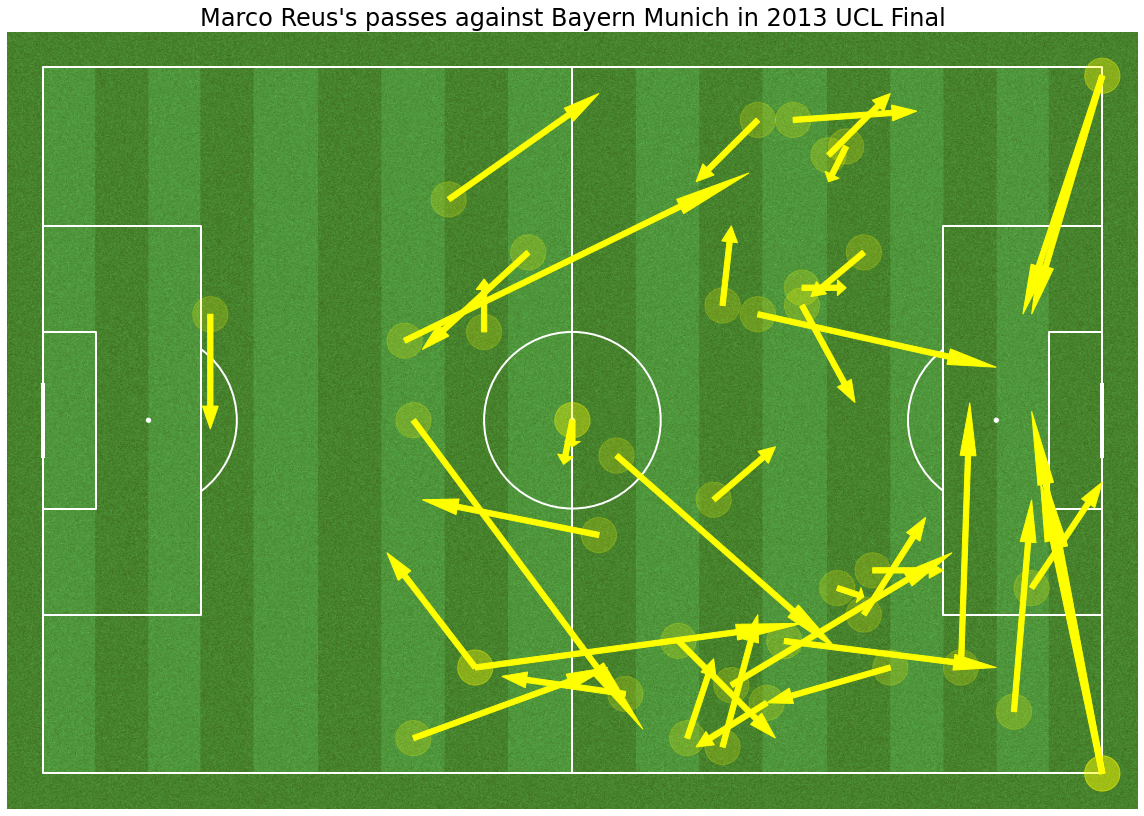

In [18]:
#Marco Reus pass map
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.draw(figsize=(16, 12))

for i,thepass in passes.iterrows():
    #Passes by Thomas Müller:
    if thepass['player_name']=='Marco Reus':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2, color="yellow")
        passCircle.set_alpha(0.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="yellow")
        ax.add_patch(passArrow)
        
ax.set_title("Marco Reus's passes against Bayern Munich in 2013 UCL Final", fontsize = 24)
fig.set_size_inches(16, 12)
plt.show()

### Plotting every players pass maps on one figure

Bayern players' pass maps.

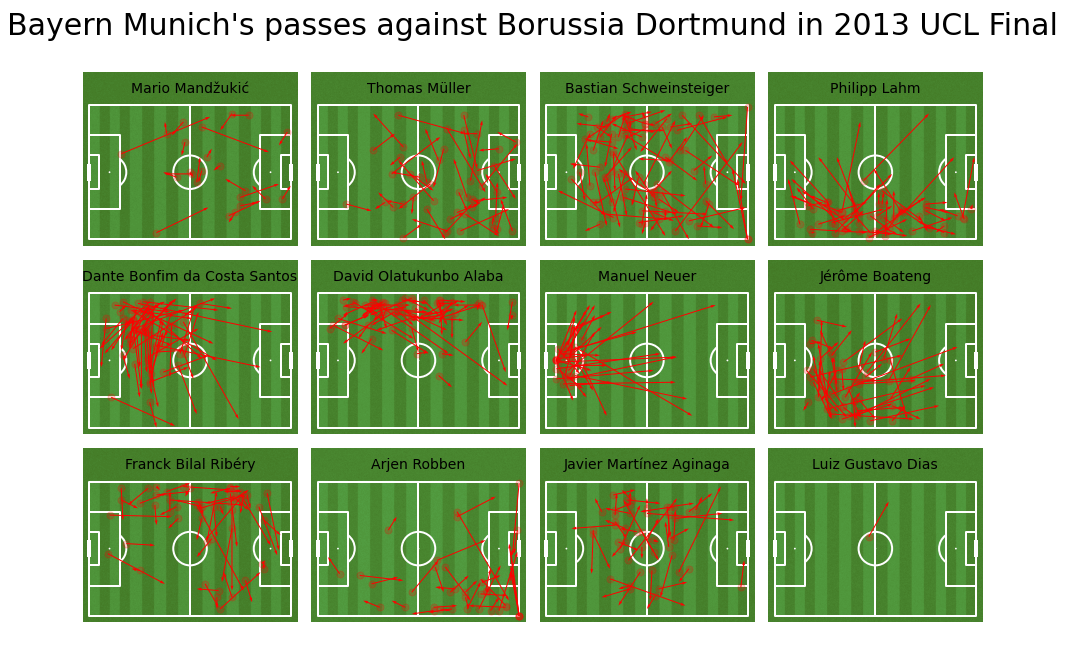

In [17]:
df_bayern_passes = df[(df.type_name == 'Pass') & (df.team_name == "Bayern Munich") & (df.sub_type_name != "Throw-in")]

#Then, subset df by keeping the relevant columns (or variables)
df_bayern_passes = df_bayern_passes[['x', 'y','end_x', 'end_y', "player_name"]]

#get the list of all players who made a pass
names = df_bayern_passes['player_name'].unique()

#facet grid - 4x4 pitches
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe_color='#c2d59d', stripe=True, pad_top=20)
fig, axs = pitch.grid(ncols=4, nrows=3, grid_height=0.85, title_height=0.06,
                     axis=False, endnote_height=0.04, title_space=0.04, 
                     endnote_space=0.01)

#for each player
for name,ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over plot
    ax.text(60, -10, name, ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_bayern_passes.loc[df_bayern_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha=0.2, s=50, color="red", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
                player_df.end_x,player_df.end_y,color="red",ax=ax, width=1)
    
#If we need to remove pitches
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()
        
#Setting title using mplsoccer library
axs['title'].text(0.5, 0.5, "Bayern Munich's passes against Borussia Dortmund in 2013 UCL Final", ha='center', va='center', fontsize=30)
plt.show()


Dortmund players' pass maps.

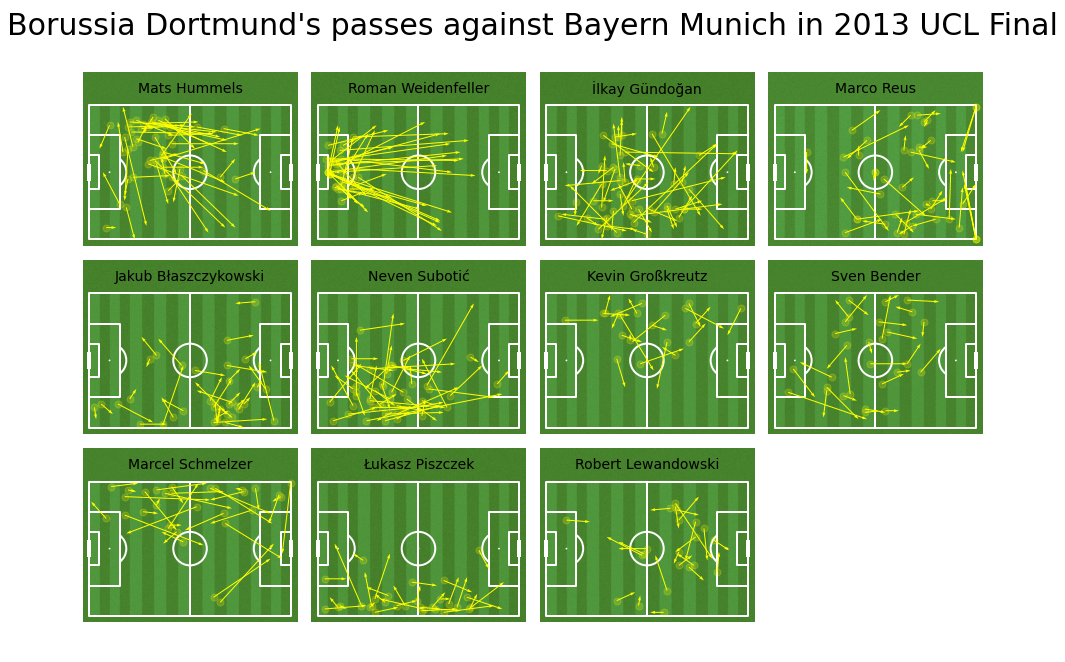

In [20]:
df_dortmund_passes = df[(df.type_name == 'Pass') & (df.team_name == "Borussia Dortmund") & (df.sub_type_name != "Throw-in")]

#Then, subset df by keeping the relevant columns (or variables)
df_dortmund_passes = df_dortmund_passes[['x', 'y','end_x', 'end_y', "player_name"]]

#get the list of all players who made a pass
names = df_dortmund_passes['player_name'].unique()

#facet grid - 4x4 pitches
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe_color='#c2d59d', stripe=True, pad_top=20)
fig, axs = pitch.grid(ncols=4, nrows=3, grid_height=0.85, title_height=0.06,
                     axis=False, endnote_height=0.04, title_space=0.04, 
                     endnote_space=0.01)

#for each player
for name,ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over plot
    ax.text(60, -10, name, ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_dortmund_passes.loc[df_dortmund_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha=0.2, s=50, color="yellow", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
                player_df.end_x,player_df.end_y,color="yellow",ax=ax, width=1)
    
#If we need to remove pitches
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()
        
#Setting title using mplsoccer library
axs['title'].text(0.5, 0.5, "Borussia Dortmund's passes against Bayern Munich in 2013 UCL Final", ha='center', va='center', fontsize=30)
plt.show()


### Pass Networks

Next, we plot the passing networks for both Bayern Munich and Borussia Dortmund in the UCL Final.

In [21]:
#Check for index of first sub
sub_bayern = df.loc[df["type_name"]=="Substitution"].loc[df["team_name"]=="Bayern Munich"].iloc[0]["index"]
sub_dortmund = df.loc[df["type_name"]=="Substitution"].loc[df["team_name"]=="Borussia Dortmund"].iloc[0]["index"]

#First filter df by passing events, team, starting XI, non-shooting outcomes, and non throw-ins.
df_pass_bayern = df[(df.type_name == 'Pass') & (df.team_name == "Bayern Munich") & (df.index < sub_bayern) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")]
df_pass_dortmund = df[(df.type_name == 'Pass') & (df.team_name == "Borussia Dortmund") & (df.index < sub_dortmund) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")]

#Then, subset df by keeping the relevant columns (or variables)
df_pass_bayern = df_pass_bayern[['x', 'y','end_x', 'end_y', "player_name", "pass_recipient_name"]]
df_pass_dortmund = df_pass_dortmund[['x', 'y','end_x', 'end_y', "player_name", "pass_recipient_name"]]

#adjusting that only the surname of the a player is presented. for example, Leo Messi's name in Statbomb is his full name "Lionel Andres Messi Cuccittini"
df_pass_bayern["player_name"] = df_pass_bayern["player_name"].apply(lambda x: str(x).split()[-1])
df_pass_bayern["pass_recipient_name"] = df_pass_bayern["pass_recipient_name"].apply(lambda x: str(x).split()[-1])
df_pass_dortmund["player_name"] = df_pass_dortmund["player_name"].apply(lambda x: str(x).split()[-1])
df_pass_dortmund["pass_recipient_name"] = df_pass_dortmund["pass_recipient_name"].apply(lambda x: str(x).split()[-1])


Plotting Bayern Munich's passing network

In [22]:
#Plotting the nodes that represent Bayern Munich players
scatter_bayern_df = pd.DataFrame()
for i, name in enumerate(df_pass_bayern["player_name"].unique()):
    passx_bayern = df_pass_bayern.loc[df_pass_bayern["player_name"] == name]["x"].to_numpy()
    recx_bayern = df_pass_bayern.loc[df_pass_bayern["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy_bayern = df_pass_bayern.loc[df_pass_bayern["player_name"] == name]["y"].to_numpy()
    recy_bayern = df_pass_bayern.loc[df_pass_bayern["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_bayern_df.at[i, "player_name"] = name
    #each node/circle x,y coordinates represents the player's average passes and receptions
    scatter_bayern_df.at[i, "x"] = np.mean(np.concatenate([passx_bayern, recx_bayern]))
    scatter_bayern_df.at[i, "y"] = np.mean(np.concatenate([passy_bayern, recy_bayern]))
    #calculate number of passes
    scatter_bayern_df.at[i, "no"] = df_pass_bayern.loc[df_pass_bayern["player_name"] == name].count().iloc[0]

#adjust the size of a circle to indicate which to correspond the number of passes made by players in a particular match.
scatter_bayern_df['marker_size'] = (scatter_bayern_df['no'] / scatter_bayern_df['no'].max() * 1500)    


In [23]:
#Counting passes between players
df_pass_bayern["pair_key"] = df_pass_bayern.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_bayern_df = df_pass_bayern.groupby(["pair_key"]).x.count().reset_index()
lines_bayern_df.rename({'x':'pass_count'}, axis='columns', inplace=True)

#setting thresholds for pair-key (passes between players)
lines_bayern_df = lines_bayern_df[lines_bayern_df['pass_count']>2]


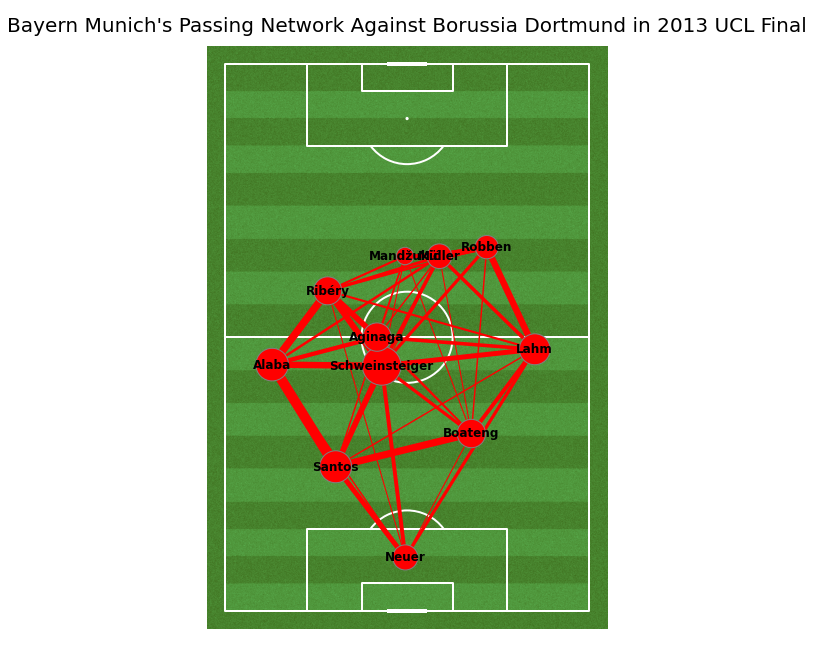

In [42]:
pitch = VerticalPitch(pitch_color='grass', line_color='white',
              stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                    endnote_height=0.04, title_space=0, endnote_space=0)

#Plotting Nodes/Vertices/Players on the Pitch
pitch.scatter(scatter_bayern_df.x, scatter_bayern_df.y, s=scatter_bayern_df.marker_size, color='red',
              edgecolors = 'grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder=3)


for i, row in scatter_bayern_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center',
                  weight = "bold", size=12, ax=ax["pitch"], zorder=4)
    
#Drawing the passing lines on pitch
for i, row in lines_bayern_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #taking the average location of players to plot a line between them
        player1_x = scatter_bayern_df.loc[scatter_bayern_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_bayern_df.loc[scatter_bayern_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_bayern_df.loc[scatter_bayern_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_bayern_df.loc[scatter_bayern_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that line thickness represent the number of passes
        line_width = (num_passes / lines_bayern_df['pass_count'].max() * 10)
        #plotting passing lines
        pitch.lines(player1_x, player1_y, player2_x, player2_y, alpha=1, lw=line_width,
               zorder=2, color="red", ax=ax["pitch"])

ax['title'].text(0.5, 0.5,"Bayern Munich's Passing Network Against Borussia Dortmund in 2013 UCL Final",ha='center', va='center', fontsize = 20)
plt.show()

Let's calculate the centralization index for all Bayern Munich's passes

Centralization is when team a team passes to certain player(s) at a higher rate. To measure the degree of centralization in a team's passing network, we use a "Centralization Index"). To calculate a centralization index, we, first, need to calculate the number of passes made by each player. $P_i$ are all the passes to player $i$ and $P_*$ is the passes to the player who is passed to the most. Next, we take the number of passes made by each player and divide it by the number of players on the pitch ($N$) minus one multiplied by $P_i$. This gives us our centralization index formula below:

  $$C =\frac{\sum_{i=1}^{N}(P_*-P_{i})}{(N - 1) \sum_{i=1}^{N}P_{i}}$$

In [25]:
#calculate number of successful passes by player
no_passes_bayern = df_pass_bayern.groupby(['player_name']).x.count().reset_index()
no_passes_bayern.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no_bayern = no_passes_bayern["pass_count"].max()
#calculate denominator
denominator = (10*no_passes_bayern["pass_count"]).sum()
#calculate nominator
nominator = (max_no_bayern - no_passes_bayern["pass_count"]).sum()
#calculate the centralization index
centralization_index = nominator/denominator
print("Centralization index is ", centralization_index)


Centralization index is  0.08289156626506024


The centralization index of 0.08 (centralized index = 1 (perfectly centralized)) indicates that Bayern Munich displayed a more de-centralized passing network against Borussia Dortmund as shown in the passing network. In other words, passes among a plurality of players are distributed at a similiar rate, instead of, for example, 1 or 2 players distribute the vast majority of passes.

In general, a de-centralized passing network is better than one that is centralized. Clubs that have a centralized passing networks have more predictable patterns of play enables opposing defenses to focus on one or two players and to prevent the passes to reach these player(s) by shutting down possible passing lanes or having multiple defenders marking the same player.

Plotting Bayern Munich's passing network for progressive passes.

In [26]:
#Create a variable for progressive passes
df_pass_bayern['delta_x'] = df_pass_bayern['end_x'] - df_pass_bayern['x']
df_pass_bayern.head()

x     y  end_x  end_y     player_name pass_recipient_name  \
4   60.0  40.0   62.0   43.0       Mandžukić              Müller   
7   61.0  43.0   44.0   40.0          Müller      Schweinsteiger   
10  43.0  41.0   48.0   66.0  Schweinsteiger                Lahm   
14  48.0  60.0   26.0   31.0            Lahm              Santos   
17  24.0  24.0   36.0    7.0          Santos               Alaba   

                 pair_key  delta_x  
4        Mandžukić_Müller      2.0  
7   Müller_Schweinsteiger    -17.0  
10    Lahm_Schweinsteiger      5.0  
14            Lahm_Santos    -22.0  
17           Alaba_Santos     12.0

In [27]:
#Adding the delta_x variable to the filter. Filtering delta_x by greater than 0 as these are the progressive passes.
df_pass_bayern_progress = df_pass_bayern[df_pass_bayern['delta_x']>0]

#Then, subset df by keeping the relevant columns (or variables)
df_pass_bayern_progress  = df_pass_bayern_progress[['x', 'y','end_x', 'end_y', "player_name", "pass_recipient_name"]]

#adjusting that only the surname of the a player is presented. for example, Leo Messi's name in Statbomb is his full name "Lionel Andres Messi Cuccittini"
df_pass_bayern_progress["player_name"] = df_pass_bayern_progress["player_name"].apply(lambda x: str(x).split()[-1])
df_pass_bayern_progress["pass_recipient_name"] = df_pass_bayern_progress["pass_recipient_name"].apply(lambda x: str(x).split()[-1])


In [28]:
scatter_prog_bayern_df = pd.DataFrame()
for i, name in enumerate(df_pass_bayern_progress["player_name"].unique()):
    passx_prog_bayern = df_pass_bayern_progress.loc[df_pass_bayern_progress["player_name"] == name]["x"].to_numpy()
    recx_prog_bayern = df_pass_bayern_progress.loc[df_pass_bayern_progress["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy_prog_bayern = df_pass_bayern_progress.loc[df_pass_bayern_progress["player_name"] == name]["y"].to_numpy()
    recy_prog_bayern = df_pass_bayern_progress.loc[df_pass_bayern_progress["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_prog_bayern_df.at[i, "player_name"] = name
    #each node/circle x,y coordinates represents the player's average passes and receptions
    scatter_prog_bayern_df.at[i, "x"] = np.mean(np.concatenate([passx_prog_bayern, recx_prog_bayern]))
    scatter_prog_bayern_df.at[i, "y"] = np.mean(np.concatenate([passy_prog_bayern, recy_prog_bayern]))
    #calculate number of passes
    scatter_prog_bayern_df.at[i, "no"] = df_pass_bayern_progress.loc[df_pass_bayern_progress["player_name"] == name].count().iloc[0]

#adjust the size of a circle to indicate which to correspond the number of passes made by players in a particular match.
scatter_prog_bayern_df['marker_size'] = (scatter_prog_bayern_df['no'] / scatter_prog_bayern_df['no'].max() * 1500)    


In [29]:
#Counting passes between players
df_pass_bayern_progress["pair_key"] = df_pass_bayern_progress.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_bayern_progress_df = df_pass_bayern_progress.groupby(["pair_key"]).x.count().reset_index()
lines_bayern_progress_df.rename({'x':'pass_count'}, axis='columns', inplace=True)

#setting thresholds for pair-key (passes between players)
lines_bayern_progress_df = lines_bayern_progress_df[lines_bayern_progress_df['pass_count']>2]


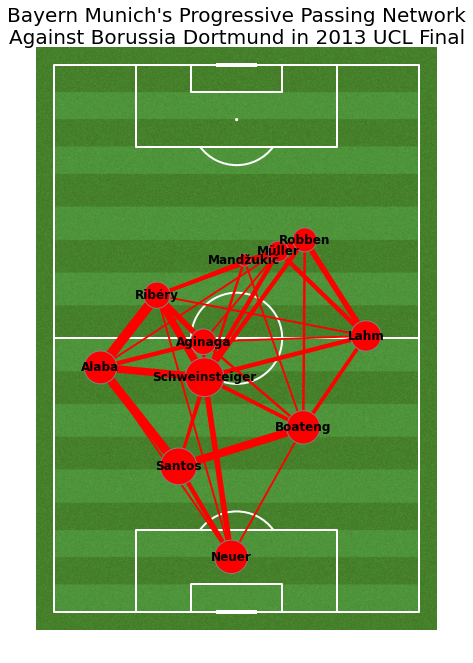

In [30]:
pitch = VerticalPitch(pitch_color='grass', line_color='white',
              stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                    endnote_height=0.04, title_space=0, endnote_space=0)

#Plotting Nodes/Vertices/Players on the Pitch
pitch.scatter(scatter_prog_bayern_df.x, scatter_prog_bayern_df.y, s=scatter_prog_bayern_df.marker_size, color='red',
              edgecolors = 'grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder=3)


for i, row in scatter_prog_bayern_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center',
                  weight = "bold", size=12, ax=ax["pitch"], zorder=4)
    
#Drawing the passing lines on pitch
for i, row in lines_bayern_progress_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #taking the average location of players to plot a line between them
        player1_x = scatter_prog_bayern_df.loc[scatter_prog_bayern_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_prog_bayern_df.loc[scatter_prog_bayern_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_prog_bayern_df.loc[scatter_prog_bayern_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_prog_bayern_df.loc[scatter_prog_bayern_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that line thickness represent the number of passes
        line_width = (num_passes / lines_bayern_progress_df['pass_count'].max() * 10)
        #plotting passing lines
        pitch.lines(player1_x, player1_y, player2_x, player2_y, alpha=1, lw=line_width,
               zorder=2, color="red", ax=ax["pitch"])

ax['title'].text(0.5,0.5,"Bayern Munich's Progressive Passing Network\nAgainst Borussia Dortmund in 2013 UCL Final", ha='center', va='center', fontsize=20)
#plt.title("Bayern Munich's Progressive Passing Network Against Borussia Dortmund in 2013 UCL Final", loc="center")
plt.show()

Centralization Index for Bayern Munich's progressive passing network

In [31]:
#calculate number of successful passes by player
no_prog_passes_bayern = df_pass_bayern_progress.groupby(['player_name']).x.count().reset_index()
no_prog_passes_bayern.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no_prog_bayern = no_prog_passes_bayern["pass_count"].max()
#calculate denominator
denominator = (10*no_prog_passes_bayern["pass_count"]).sum()
#calculate nominator
nominator = (max_no_prog_bayern - no_prog_passes_bayern["pass_count"]).sum()
#calculate the centralization index
centralization_index = nominator/denominator
print("Centralization index is ", centralization_index)


Centralization index is  0.07228915662650602


Bayern Munich's progressive passing network is slightly more de-centralized than its overall passing network. As depicted in the progressive network, it appears that Dante, Bayern's left center-back appeard to be the one who starts the build-up for the Bayern's attack by passing to his fellow center-back on the right side, Jerome Boateng, who is more in an advanced position. Dante also distributes the ball to Alaba, Bayern's left wing-back, as well as Schweinsteiger in the midfield who passes the ball to numerous attacking options, like Ribéry, Müller, and Robben.

Alright, we've seen Bayern Munich's passing patterns through its pass networks, now let's see the passing networks for Borussia Dortmund.

Plotting Borussia Dortmund's passing networks

In [32]:
#Plotting the nodes that represent Borussia Dortmund players
scatter_dortmund_df = pd.DataFrame()
for i, name in enumerate(df_pass_dortmund["player_name"].unique()):
    passx_dortmund = df_pass_dortmund.loc[df_pass_dortmund["player_name"] == name]["x"].to_numpy()
    recx_dortmund = df_pass_dortmund.loc[df_pass_dortmund["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy_dortmund = df_pass_dortmund.loc[df_pass_dortmund["player_name"] == name]["y"].to_numpy()
    recy_dortmund = df_pass_dortmund.loc[df_pass_dortmund["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_dortmund_df.at[i, "player_name"] = name
    #each node/circle x,y coordinates represents the player's average passes and receptions
    scatter_dortmund_df.at[i, "x"] = np.mean(np.concatenate([passx_dortmund, recx_dortmund]))
    scatter_dortmund_df.at[i, "y"] = np.mean(np.concatenate([passy_dortmund, recy_dortmund]))
    #calculate number of passes
    scatter_dortmund_df.at[i, "no"] = df_pass_dortmund.loc[df_pass_dortmund["player_name"] == name].count().iloc[0]

#adjust the size of a circle to indicate which to correspond the number of passes made by players in a particular match.
scatter_dortmund_df['marker_size'] = (scatter_dortmund_df['no'] / scatter_dortmund_df['no'].max() * 1500)    


In [33]:
#Counting passes between players
df_pass_dortmund["pair_key"] = df_pass_dortmund.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_dortmund_df = df_pass_dortmund.groupby(["pair_key"]).x.count().reset_index()
lines_dortmund_df.rename({'x':'pass_count'}, axis='columns', inplace=True)

#setting thresholds for pair-key (passes between players)
lines_dortmund_df = lines_dortmund_df[lines_dortmund_df['pass_count']>2]


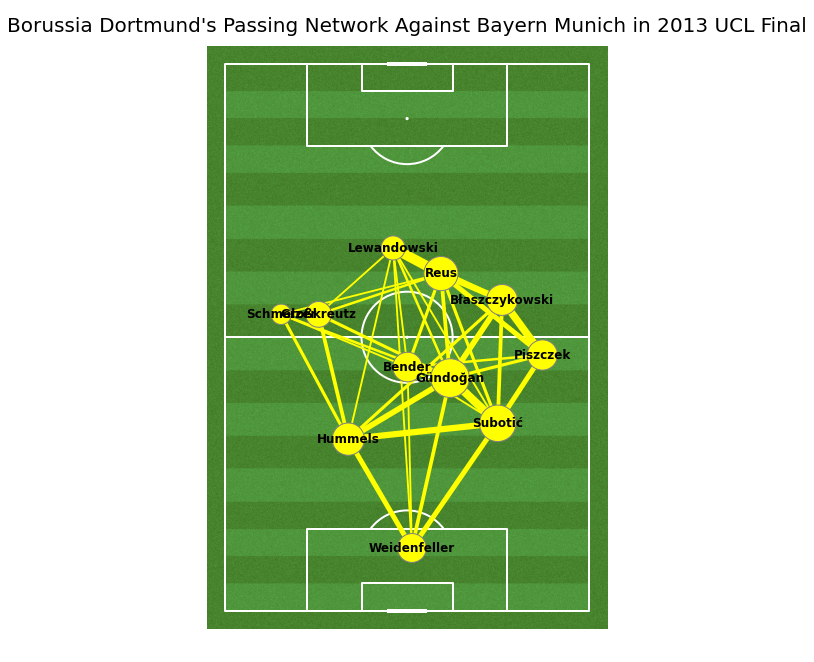

In [34]:
pitch = VerticalPitch(pitch_color='grass', line_color='white',
              stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                    endnote_height=0.04, title_space=0, endnote_space=0)

#Plotting Nodes/Vertices/Players on the Pitch
pitch.scatter(scatter_dortmund_df.x, scatter_dortmund_df.y, s=scatter_dortmund_df.marker_size, color='yellow',
              edgecolors = 'grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder=3)


for i, row in scatter_dortmund_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center',
                  weight = "bold", size=12, ax=ax["pitch"], zorder=4)
    
#Drawing the passing lines on pitch
for i, row in lines_dortmund_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #taking the average location of players to plot a line between them
        player1_x = scatter_dortmund_df.loc[scatter_dortmund_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_dortmund_df.loc[scatter_dortmund_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_dortmund_df.loc[scatter_dortmund_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_dortmund_df.loc[scatter_dortmund_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that line thickness represent the number of passes
        line_width = (num_passes / lines_dortmund_df['pass_count'].max() * 10)
        #plotting passing lines
        pitch.lines(player1_x, player1_y, player2_x, player2_y, alpha=1, lw=line_width,
               zorder=2, color="yellow", ax=ax["pitch"])

ax['title'].text(0.5, 0.5,"Borussia Dortmund's Passing Network Against Bayern Munich in 2013 UCL Final",ha='center', va='center', fontsize=20)
plt.show()

Let's calculate the centralization index for all Borussia Dortmund's passes

In [35]:
#calculate number of successful passes by player
no_passes_dortmund = df_pass_dortmund.groupby(['player_name']).x.count().reset_index()
no_passes_dortmund.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no_dortmund = no_passes_dortmund["pass_count"].max()
#calculate denominator
denominator = (10*no_passes_dortmund["pass_count"]).sum()
#calculate nominator
nominator = (max_no_dortmund - no_passes_dortmund["pass_count"]).sum()
#calculate the centralization index
centralization_index = nominator/denominator
print("Centralization index is ", centralization_index)


Centralization index is  0.06032388663967611


Like Bayern, Dortmund's overall pass network is also de-centralized with a centralization index of 0.06. In fact, Dortmund's overall pass network was more de-centralized than that of Bayern's but still lost the game. Let's take a look at Dortmund's passing network and its centralization index to understand the patterns of play when attacking.

In [36]:
#Create a variable for progressive passes
df_pass_dortmund['delta_x'] = df_pass_dortmund['end_x'] - df_pass_dortmund['x']
df_pass_dortmund.head()

x     y  end_x  end_y     player_name pass_recipient_name  \
107   79.0  67.0   87.0   54.0        Gündoğan                Reus   
123   82.0  72.0   74.0   77.0            Reus      Błaszczykowski   
126   74.0  77.0  106.0   75.0  Błaszczykowski                Reus   
133  104.0  68.0  105.0   38.0            Reus         Lewandowski   
156   77.0  62.0   93.0   57.0        Gündoğan         Lewandowski   

                 pair_key  delta_x  
107         Gündoğan_Reus      8.0  
123   Błaszczykowski_Reus     -8.0  
126   Błaszczykowski_Reus     32.0  
133      Lewandowski_Reus      1.0  
156  Gündoğan_Lewandowski     16.0

In [37]:
#Adding the delta_x variable to the filter. Filtering delta_x by greater than 0 as these are the progressive passes.
df_pass_dortmund_progress = df_pass_dortmund[df_pass_dortmund['delta_x']>0]

#Then, subset df by keeping the relevant columns (or variables)
df_pass_dortmund_progress  = df_pass_dortmund_progress[['x', 'y','end_x', 'end_y', "player_name", "pass_recipient_name"]]

#adjusting that only the surname of the a player is presented. for example, Leo Messi's name in Statbomb is his full name "Lionel Andres Messi Cuccittini"
df_pass_dortmund_progress["player_name"] = df_pass_dortmund_progress["player_name"].apply(lambda x: str(x).split()[-1])
df_pass_dortmund_progress["pass_recipient_name"] = df_pass_dortmund_progress["pass_recipient_name"].apply(lambda x: str(x).split()[-1])


In [38]:
scatter_prog_dortmund_df = pd.DataFrame()
for i, name in enumerate(df_pass_dortmund_progress["player_name"].unique()):
    passx_prog_dortmund = df_pass_dortmund_progress.loc[df_pass_dortmund_progress["player_name"] == name]["x"].to_numpy()
    recx_prog_dortmund = df_pass_dortmund_progress.loc[df_pass_dortmund_progress["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy_prog_dortmund = df_pass_dortmund_progress.loc[df_pass_dortmund_progress["player_name"] == name]["y"].to_numpy()
    recy_prog_dortmund = df_pass_dortmund_progress.loc[df_pass_dortmund_progress["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_prog_dortmund_df.at[i, "player_name"] = name
    #each node/circle x,y coordinates represents the player's average passes and receptions
    scatter_prog_dortmund_df.at[i, "x"] = np.mean(np.concatenate([passx_prog_dortmund, recx_prog_dortmund]))
    scatter_prog_dortmund_df.at[i, "y"] = np.mean(np.concatenate([passy_prog_dortmund, recy_prog_dortmund]))
    #calculate number of passes
    scatter_prog_dortmund_df.at[i, "no"] = df_pass_dortmund_progress.loc[df_pass_dortmund_progress["player_name"] == name].count().iloc[0]

#adjust the size of a circle to indicate which to correspond the number of passes made by players in a particular match.
scatter_prog_dortmund_df['marker_size'] = (scatter_prog_dortmund_df['no'] / scatter_prog_dortmund_df['no'].max() * 1500)    


In [39]:
#Counting passes between players
df_pass_dortmund_progress["pair_key"] = df_pass_dortmund_progress.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_dortmund_progress_df = df_pass_dortmund_progress.groupby(["pair_key"]).x.count().reset_index()
lines_dortmund_progress_df.rename({'x':'pass_count'}, axis='columns', inplace=True)

#setting thresholds for pair-key (passes between players)
lines_dortmund_progress_df = lines_dortmund_progress_df[lines_dortmund_progress_df['pass_count']>2]


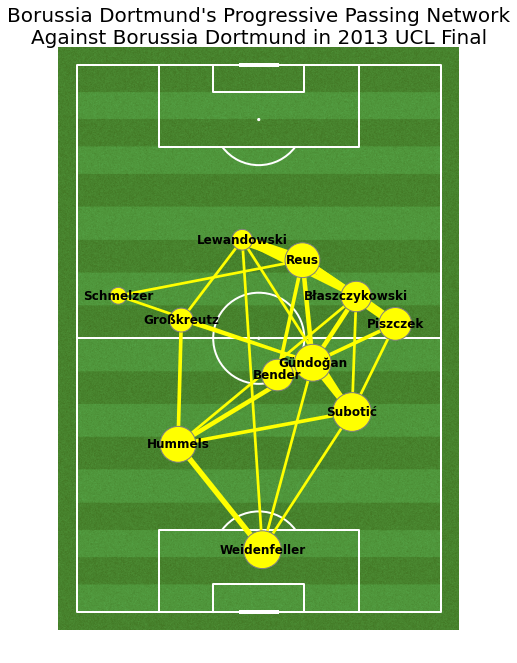

In [40]:
pitch = VerticalPitch(pitch_color='grass', line_color='white',
              stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                    endnote_height=0.04, title_space=0, endnote_space=0)

#Plotting Nodes/Vertices/Players on the Pitch
pitch.scatter(scatter_prog_dortmund_df.x, scatter_prog_dortmund_df.y, s=scatter_prog_dortmund_df.marker_size, color='yellow',
              edgecolors = 'grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder=3)


for i, row in scatter_prog_dortmund_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center',
                  weight = "bold", size=12, ax=ax["pitch"], zorder=4)
    
#Drawing the passing lines on pitch
for i, row in lines_dortmund_progress_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #taking the average location of players to plot a line between them
        player1_x = scatter_prog_dortmund_df.loc[scatter_prog_dortmund_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_prog_dortmund_df.loc[scatter_prog_dortmund_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_prog_dortmund_df.loc[scatter_prog_dortmund_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_prog_dortmund_df.loc[scatter_prog_dortmund_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that line thickness represent the number of passes
        line_width = (num_passes / lines_dortmund_progress_df['pass_count'].max() * 10)
        #plotting passing lines
        pitch.lines(player1_x, player1_y, player2_x, player2_y, alpha=1, lw=line_width,
               zorder=2, color="yellow", ax=ax["pitch"])

ax['title'].text(0.5,0.5,"Borussia Dortmund's Progressive Passing Network\nAgainst Borussia Dortmund in 2013 UCL Final", ha='center', va='center', fontsize=20)
#plt.title("dortmund Munich's Progressive Passing Network Against Borussia Dortmund in 2013 UCL Final", loc="center")
plt.show()

Centralization Index for Borussia Dortmund's progressive passing network

In [41]:
#calculate number of successful passes by player
no_prog_passes_dortmund = df_pass_dortmund_progress.groupby(['player_name']).x.count().reset_index()
no_prog_passes_dortmund.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no_prog_dortmund = no_prog_passes_dortmund["pass_count"].max()
#calculate denominator
denominator = (10*no_prog_passes_dortmund["pass_count"]).sum()
#calculate nominator
nominator = (max_no_prog_dortmund - no_prog_passes_dortmund["pass_count"]).sum()
#calculate the centralization index
centralization_index = nominator/denominator
print("Centralization index is ", centralization_index)


Centralization index is  0.04903225806451613


Again, Dortmund's is also de-centralized, with a centralization index of 0.05 and even more than that of Bayern's. However, Borussia's progressive passing network has some interesting insights. One, when attacking, Dortmund primarily use the right side of the pitch to launch its attack, rarely using the left side to progress the ball. This is different than Bayern, Bayern used both side of the pitch in launching its attack, but uses more of the left-side to do so. Two, it appears that Dortmund were trying to progress the ball to Lewandowski, primarily from the right-side of the pitch. Again, this is different from Bayern in which the ball was progressed to multiple attackers, like Ribéry, Müller, Robben, and Mandžukic. This aspect of the tactics deployed by both teams has had an influence in the outcome of the match.

In [ ]:
### END OF CODE ###